In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [3]:
#Ex.1 
data= pd.read_csv('Data_Cortex_Nuclear.csv')
data.head(10)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
5,309_6,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,...,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,Control,Memantine,C/S,c-CS-m
6,309_7,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,...,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484,Control,Memantine,C/S,c-CS-m
7,309_8,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,...,0.113080,0.382532,0.123376,0.155612,0.159409,1.652658,Control,Memantine,C/S,c-CS-m
8,309_9,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,...,0.105490,0.435687,0.125173,0.152711,0.158235,1.834599,Control,Memantine,C/S,c-CS-m
9,309_10,0.380827,0.499294,0.362462,2.096266,3.598587,0.227649,0.188093,1.717861,0.188093,...,0.116906,0.414793,0.146133,0.188849,0.192334,1.516862,Control,Memantine,C/S,c-CS-m


In [4]:
#Ex.2.

complet_data= data.fillna("0",axis=1)
featureData = complet_data.drop(['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class'], axis=1).values



In [5]:
#Ex.3.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(featureData))
StandardScaler(copy=True, with_mean=True, with_std=True)
print(scaler.mean_)
print(featureData.shape[1])
standardizedFeatures= StandardScaler().fit_transform(featureData)
standardizedFeatures

StandardScaler(copy=True, with_mean=True, with_std=True)
[0.42462736 0.61538781 0.31820203 2.2908878  3.83325635 0.23252041
 0.18134132 3.5272838  0.21198345 1.42471336 0.5443877  0.31263458
 0.3170563  0.27426922 0.82351886 0.72491359 1.55762652 1.52110067
 0.44161758 0.68034139 0.3774671  0.3623473  0.17999021 1.15384311
 2.46761796 1.16934541 0.2409729  0.27102091 0.69125408 0.16794894
 0.40368385 2.11077414 0.54112733 0.45120187 0.41415718 0.7569383
 0.58356015 0.36734663 0.56374627 0.35610273 0.31493552 0.41744257
 0.39337953 0.1810801  0.9431161  0.16121102 1.70659872 0.29243411
 0.4292256  1.19742003 0.21648221 0.16663124 0.17930674 0.12152082
 0.15647754 0.1813001  0.21048921 0.12088915 0.22185096 0.12656012
 0.52734866 0.29127629 1.54834766 2.23523598 0.15982097 1.23927038
 0.84876662 0.22667649 0.12677004 0.09919962 0.12152082 0.12195213
 0.44607302 0.14134102 0.14752504 0.15407968 1.33778375]
77


array([[ 0.31618416,  0.52042534,  2.15027235, ..., -0.19417158,
        -0.25611341,  1.06590091],
       [ 0.36009334,  0.290904  ,  1.79683383, ..., -0.15328958,
        -0.2271027 ,  1.28029118],
       [ 0.33834925,  0.45351344,  1.92239433, ..., -0.17477542,
        -0.2635763 ,  1.85703831],
       ...,
       [-0.78400393, -0.86947905, -1.61470117, ...,  1.00779164,
         1.989372  ,  0.29352469],
       [-0.81384366, -0.79953248, -1.42543115, ...,  1.28079644,
         2.08966612,  0.2089962 ],
       [-0.4881888 , -0.60935676, -1.18365644, ...,  1.30150693,
         2.08892271,  0.10478825]])

In [6]:

info= [[0, 0, 2], [0, 0, -1], [1, 1, 3], [1, 1, 0]]
scaler = StandardScaler()
print(scaler.fit(info))


StandardScaler(copy=True, with_mean=True, with_std=True)


In [38]:
#Ex.4. 

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

numFeatures = 5
targetData = complet_data['class']
numericalData = standardizedFeatures

best_features = SelectKBest(mutual_info_classif, k=numFeatures).fit_transform(numericalData,targetData)
dataset = pd.DataFrame({'Column1': best_features[:, 0], 'Column2': best_features[:, 1], 'Column3': best_features[:, 2], 'Column4': best_features[:, 3], 'Column5': best_features[:, 4]})
#best_features
dataset

,Column1,Column2,Column3,Column4,Column5
0,0.316184,0.414956,-0.609653,-0.455759,1.065901
1,0.360093,0.435484,-0.706386,-0.462039,1.280291
2,0.338349,0.384430,-0.701353,-0.315190,1.857038
3,0.069943,0.112440,-0.698464,-0.162955,1.144490
4,0.041267,0.019003,-0.753112,-0.105144,1.583530
...,...,...,...,...,...
1075,-0.679322,-0.805940,0.990941,1.598526,0.085303
1076,-0.609945,-0.792244,1.112361,1.533497,0.084215
1077,-0.784004,-0.836579,0.428707,1.594134,0.293525
1078,-0.813844,-0.907115,0.558739,1.648477,0.208996


In [8]:
#Ex.5. 
#import seaborn as sns; sns.set()
#sns.set(style="ticks", color_codes=True)


In [9]:
#Ex.6. 
nr_components=5
pca = PCA(n_components = nr_components).fit(standardizedFeatures)

pcaFeatures = pd.DataFrame(pca.transform(standardizedFeatures))
pcaFeatures

,0,1,2,3,4
0,-4.150955,4.895384,-1.697352,-1.914854,-0.656776
1,-2.563560,4.804695,-0.827996,-1.477078,-0.322833
2,-2.653338,5.035138,-0.532218,-1.225556,-0.049164
3,-0.524966,3.552819,-2.643803,-0.672296,-0.034376
4,0.554189,3.672825,-1.477558,-0.398741,0.204581
...,...,...,...,...,...
1075,4.419346,-0.784647,1.934460,5.268478,-1.015907
1076,3.672633,-1.268877,1.299798,5.324706,-0.471879
1077,6.977456,-1.834747,2.857135,6.275555,-0.246875
1078,5.880329,-2.021917,3.197363,6.521200,-0.626535


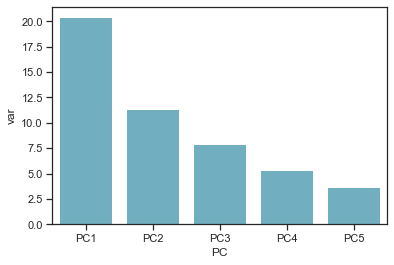

In [12]:

#Ex.7. 

df1=pd.DataFrame({'var':pca.explained_variance_,'PC':['PC1','PC2','PC3','PC4','PC5']})

sns.barplot(x='PC',y='var', data=df1, color="c")